# 1er Parcial
Elaborado por Zaira Valentina Ávila Lazcano

1. Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes
    1. Indicar el porcentaje de la información utilizando los 3 componentes principales
    1. Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos
    
1. Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv
    1. ¿Que notan de extraño en la columna "Cbarseness" al normalizar el dataset?
    1. Determinar el porcentaje de aporte de cada vector propio
    1. Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos
    1. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados
    1. Hacer la comparsión de los pairplot con la data original y la data proyectada
    
Nota: En el dataset Iris, la variable "Species" era descartada; en el dataset Brain_tumor, descartar la variable 'Class'

# DataSet IRIS
1. Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes

In [468]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = pd.read_csv('/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S03_datasets/iris/iris.csv')
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [469]:
# Descartar la columna 'Species'
iris_data = iris.drop(columns=['Species'])
iris_data.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [470]:
media, sigma = iris_data.mean(axis=0), iris_data.std(axis=0)
X_iris_std = (iris_data - media)/sigma

In [471]:
pca_iris = PCA(n_components=3)
X_iris_pca = pca_iris.fit_transform(X_iris_std)

In [472]:
# Normalizar los datos
scalar = StandardScaler()
iris_scalar = scalar.fit_transform(iris_data)
print(iris_scalar)


[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

1. Indicar el porcentaje de la información utilizando los 3 componentes principales

In [473]:
# Realizar PCA con 3 componentes principales
pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(iris_scalar)
print(componentes_principales)

[[-2.26470281  0.4800266   0.12770602]
 [-2.08096115 -0.67413356  0.23460885]
 [-2.36422905 -0.34190802 -0.04420148]
 [-2.29938422 -0.59739451 -0.09129011]
 [-2.38984217  0.64683538 -0.0157382 ]
 [-2.07563095  1.48917752 -0.02696829]
 [-2.44402884  0.0476442  -0.3354704 ]
 [-2.23284716  0.22314807  0.0886955 ]
 [-2.33464048 -1.11532768 -0.14507686]
 [-2.18432817 -0.46901356  0.25376557]
 [-2.1663101   1.04369065  0.2686811 ]
 [-2.32613087  0.13307834 -0.09375924]
 [-2.2184509  -0.72867617  0.23091124]
 [-2.6331007  -0.96150673 -0.18079608]
 [-2.1987406   1.86005711  0.472901  ]
 [-2.26221453  2.68628449 -0.03052661]
 [-2.2075877   1.48360936  0.00534409]
 [-2.19034951  0.48883832  0.04421532]
 [-1.898572    1.40501879  0.37434327]
 [-2.34336905  1.12784938 -0.13263047]
 [-1.914323    0.40885571  0.42129259]
 [-2.20701284  0.92412143 -0.15986528]
 [-2.7743447   0.45834367 -0.3321791 ]
 [-1.81866953  0.08555853 -0.0344886 ]
 [-2.22716331  0.13725446 -0.11799354]
 [-1.95184633 -0.62561859

In [474]:
# Calcular el porcentaje de información para cada uno de los 3 componentes principales
varianza_explicada = pca.explained_variance_ratio_
porc_inf_xcomponente = varianza_explicada * 100
print(porc_inf_xcomponente)

[72.96244541 22.85076179  3.66892189]


In [475]:
# Porcentaje de información para cada componente
for i, porcentaje in enumerate(porc_inf_xcomponente):
    print(f'Porcentaje de la información del componente principal {i+1}: {porcentaje:.2f}%')

Porcentaje de la información del componente principal 1: 72.96%
Porcentaje de la información del componente principal 2: 22.85%
Porcentaje de la información del componente principal 3: 3.67%


2. Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos

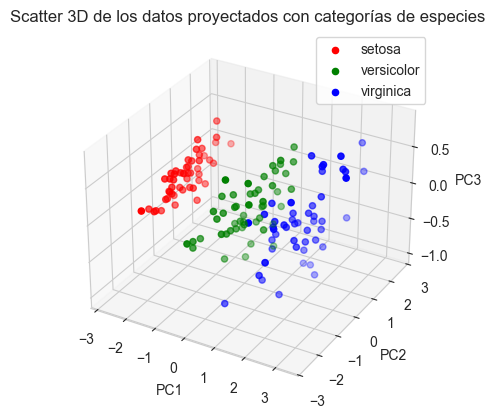

In [476]:
# El scatter plot 3D de los datos proyectados 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Mapear especies a colores
especies_unicas = iris['Species'].unique()
colores = ['r', 'g', 'b']
colores_especies = {especie: colores[i] for i, especie in enumerate(especies_unicas)}

# Esto es para cada especie con su color correspondiente
for especie in especies_unicas:
    indices = iris['Species'] == especie
    ax.scatter(componentes_principales[indices, 0], componentes_principales[indices, 1], componentes_principales[indices, 2], 
               label=especie, color=colores_especies[especie])

ax.set_title('Scatter 3D de los datos proyectados con categorías de especies')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

# DataSet Brain Tumor

1. Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv

In [477]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

brain_t = '/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv'
#brain_tumor = pd.read_csv(brain_tumor)
braint = pd.read_csv(brain_t)
braint.head()

Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
2       5.981800     0.978014  7.458341e-155  
3       7.700919     0.964189  7.458341e-155  
4       6.834689     0.972789  7.458341e-155

In [478]:
# Eliminar 'Class'
braint = braint.drop(columns=['Class', 'Image'])
braint.head()

Mean     Variance  Standard Deviation   Entropy  Skewness   Kurtosis  \
0  6.535339   619.587845           24.891522  0.109059  4.276477  18.900575   
1  8.749969   805.957634           28.389393  0.266538  3.718116  14.464618   
2  7.341095  1143.808219           33.820234  0.001467  5.061750  26.479563   
3  5.958145   959.711985           30.979219  0.001477  5.677977  33.428845   
4  7.315231   729.540579           27.010009  0.146761  4.283221  19.079108   

     Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  \
0   98.613971  0.293314  0.086033     0.530941       4.473346     0.981939   
1   63.858816  0.475051  0.225674     0.651352       3.220072     0.988834   
2   81.867206  0.031917  0.001019     0.268275       5.981800     0.978014   
3  151.229741  0.032024  0.001026     0.243851       7.700919     0.964189   
4  174.988756  0.343849  0.118232     0.501140       6.834689     0.972789   

      Coarseness  
0  7.458341e-155  
1  7.458341e-155  
2  7.458341e-155  
3  7.458341e-155  
4  7.458341e-155

1.1 Análisis de PCA 

In [479]:
braint.head()

Mean     Variance  Standard Deviation   Entropy  Skewness   Kurtosis  \
0  6.535339   619.587845           24.891522  0.109059  4.276477  18.900575   
1  8.749969   805.957634           28.389393  0.266538  3.718116  14.464618   
2  7.341095  1143.808219           33.820234  0.001467  5.061750  26.479563   
3  5.958145   959.711985           30.979219  0.001477  5.677977  33.428845   
4  7.315231   729.540579           27.010009  0.146761  4.283221  19.079108   

     Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  \
0   98.613971  0.293314  0.086033     0.530941       4.473346     0.981939   
1   63.858816  0.475051  0.225674     0.651352       3.220072     0.988834   
2   81.867206  0.031917  0.001019     0.268275       5.981800     0.978014   
3  151.229741  0.032024  0.001026     0.243851       7.700919     0.964189   
4  174.988756  0.343849  0.118232     0.501140       6.834689     0.972789   

      Coarseness  
0  7.458341e-155  
1  7.458341e-155  
2  7.458341e-155  
3  7.458341e-155  
4  7.458341e-155

In [480]:
braint_x = braint.drop(columns=['Coarseness']) 
braint_x = braint_x.select_dtypes(include=[np.number])

In [481]:
std_brainx = (braint_x - np.mean(braint_x, axis=0))/np.std(braint_x, axis=0)
std_brainx

Mean  Variance  Standard Deviation   Entropy  Skewness  Kurtosis  \
0    -0.515700 -0.195790           -0.033144  0.504650  0.067855 -0.097267   
1    -0.129018  0.202943            0.365594  2.746050 -0.150204 -0.175881   
2    -0.375013  0.925765            0.984680 -1.026708  0.374531  0.037048   
3    -0.616481  0.531896            0.660820 -1.026561  0.615188  0.160202   
4    -0.379529  0.039451            0.208352  1.041256  0.070489 -0.094103   
...        ...       ...                 ...       ...       ...       ...   
3757  2.050827  1.064921            1.092779 -0.139892 -0.789131 -0.349862   
3758  1.911290  1.104076            1.122668 -0.097345 -0.764704 -0.345702   
3759  1.488082  0.942399            0.997760 -0.074100 -0.700765 -0.333342   
3760  0.670746  0.501988            0.635006  0.203090 -0.534994 -0.294742   
3761 -0.589942 -0.492543           -0.370847  0.634342  0.003102 -0.121400   

      Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  
0    -0.268050  0.685118  0.470073     0.404100      -0.121709     1.000713  
1    -0.585492  2.090287  2.865580     1.345457      -0.799181     1.264377  
2    -0.421010 -1.335981 -0.988340    -1.649391       0.693704     0.850636  
3     0.212525 -1.335154 -0.988223    -1.840334       1.622995     0.322041  
4     0.429532  1.075849  1.022442     0.171115       1.154744     0.650854  
...        ...       ...       ...          ...            ...          ...  
3757  0.278359  0.123407 -0.170487     0.061596       0.277439    -0.183335  
3758  0.303212  0.164116 -0.130150     0.183409       0.207915    -0.115377  
3759  0.357754  0.187301 -0.106751     0.101766       0.219037    -0.137095  
3760  0.875475  0.439344  0.167517     0.006346       0.941273    -0.568517  
3761  1.016485  0.784933  0.602848     0.117900       1.129143    -0.651387  

[3762 rows x 12 columns]

In [482]:
pca_brainx = PCA()
pca_brainx = pca_brainx.fit_transform(std_brainx)
pca_brainx

array([[ 1.13494746e+00, -1.16539283e-01, -1.22073891e-01, ...,
         1.91276320e-01, -4.60578069e-03,  8.23668437e-04],
       [ 4.26214321e+00,  4.94370904e-02,  1.50070581e+00, ...,
        -1.40244217e-02, -1.53604170e-01, -1.50420695e-02],
       [-2.48138326e+00,  1.11144579e+00, -9.57833486e-01, ...,
         2.97130160e-02,  6.80276392e-02,  8.84459846e-03],
       ...,
       [-2.03598078e-01,  1.77566408e+00,  1.13305801e+00, ...,
         9.44778474e-02,  2.68384505e-02, -1.60448544e-03],
       [-2.73145067e-01,  6.55033716e-01,  1.59330341e+00, ...,
         9.82275324e-02,  5.63578665e-02, -1.97183450e-03],
       [ 3.08959021e-01, -1.21326935e+00,  1.32536124e+00, ...,
         9.02810238e-02,  7.31241445e-02, -5.82585573e-04]])

In [483]:
braint['Coarseness'].var()

np.float64(0.0)

In [484]:
import numpy as np
from sklearn.decomposition import PCA

# Estandarizar los datos
std_brainx = (braint_x - np.mean(braint_x, axis=0)) / np.std(braint_x, axis=0)


In [485]:
# PCA
pca_brainx = PCA()
pca_brainx = pca_brainx.fit_transform(std_brainx)
pca_brainx

array([[ 1.13494746e+00, -1.16539283e-01, -1.22073891e-01, ...,
         1.91276320e-01, -4.60578069e-03,  8.23668437e-04],
       [ 4.26214321e+00,  4.94370904e-02,  1.50070581e+00, ...,
        -1.40244217e-02, -1.53604170e-01, -1.50420695e-02],
       [-2.48138326e+00,  1.11144579e+00, -9.57833486e-01, ...,
         2.97130160e-02,  6.80276392e-02,  8.84459846e-03],
       ...,
       [-2.03598078e-01,  1.77566408e+00,  1.13305801e+00, ...,
         9.44778474e-02,  2.68384505e-02, -1.60448544e-03],
       [-2.73145067e-01,  6.55033716e-01,  1.59330341e+00, ...,
         9.82275324e-02,  5.63578665e-02, -1.97183450e-03],
       [ 3.08959021e-01, -1.21326935e+00,  1.32536124e+00, ...,
         9.02810238e-02,  7.31241445e-02, -5.82585573e-04]])

In [486]:
# La varianza de la columna 'Coarseness'
coarseness_variance = braint['Coarseness'].var()

print("Varianza de la columna 'Coarseness':", coarseness_variance)

Varianza de la columna 'Coarseness': 0.0


2. ¿Que notan de extraño en la columna "Coarseness" al normalizar el dataset?

Pues se observa algo inusual, tiene una varianza de cero después de la normalización. Por lo que busque acerca de esto y significa que todos los valores en esta columna son iguales. Por lo que la columna Coarseness no tiene variabilidad, lo que puede ser un indicativo de que esta característica no aporta información útil para el análisis, ya que no discrimina entre las diferentes muestras.

3. Determinar el porcentaje de aporte de cada vector propio

In [487]:
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Porcentaje de Varianza Explicada': explained_variance_ratio * 100
})

explained_variance_df.head()

Componente Principal  Porcentaje de Varianza Explicada
0                  PC1                         72.962445
1                  PC2                         22.850762
2                  PC3                          3.668922

In [488]:
pca = PCA()
pca_brainx = pca.fit_transform(std_brainx)

var_exp_brain = pca.explained_variance_ratio_ * 100

print("Porcentaje de aporte de cada vector propio:")
for i, percentage in enumerate(var_exp_brain, 1):
    print(f"Componente Principal {i}: {percentage:.2f}%")

print("Porcentaje de varianza explicada por los 3 componentes principales:", var_exp_brain[:3].sum())

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100

Porcentaje de aporte de cada vector propio:
Componente Principal 1: 40.88%
Componente Principal 2: 31.30%
Componente Principal 3: 12.87%
Componente Principal 4: 6.26%
Componente Principal 5: 4.78%
Componente Principal 6: 2.00%
Componente Principal 7: 1.08%
Componente Principal 8: 0.33%
Componente Principal 9: 0.26%
Componente Principal 10: 0.14%
Componente Principal 11: 0.09%
Componente Principal 12: 0.00%
Porcentaje de varianza explicada por los 3 componentes principales: 85.05508871084848


4. Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos

In [489]:
num_components_90_var = np.argmax(cumulative_variance_ratio >= 90) + 1

print(f"Número de componentes principales necesarios para obtener al menos un 90% de varianza explicada: {num_components_90_var}")
print(f"Porcentaje de varianza explicada acumulada con {num_components_90_var} componentes principales: {cumulative_variance_ratio[num_components_90_var-1]:.2f}%")

Número de componentes principales necesarios para obtener al menos un 90% de varianza explicada: 4
Porcentaje de varianza explicada acumulada con 4 componentes principales: 91.32%


5. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

Metodo #1

                CP1           CP2           CP3           CP4
count  3.762000e+03  3.762000e+03  3.762000e+03  3.762000e+03
mean  -3.626374e-16  1.964286e-16 -4.532968e-17  1.001030e-16
std    2.215199e+00  1.938271e+00  1.243110e+00  8.671686e-01
min   -1.513938e+01 -2.090085e+01 -3.250273e+00 -1.937457e+01
25%   -1.926164e+00 -9.822461e-01 -7.651396e-01 -2.787046e-01
50%    2.759241e-01  9.365389e-02 -6.048294e-02  7.980414e-03
75%    1.640371e+00  1.196210e+00  6.320415e-01  3.494075e-01
max    6.293261e+00  5.647893e+00  2.338631e+01  1.015092e+01


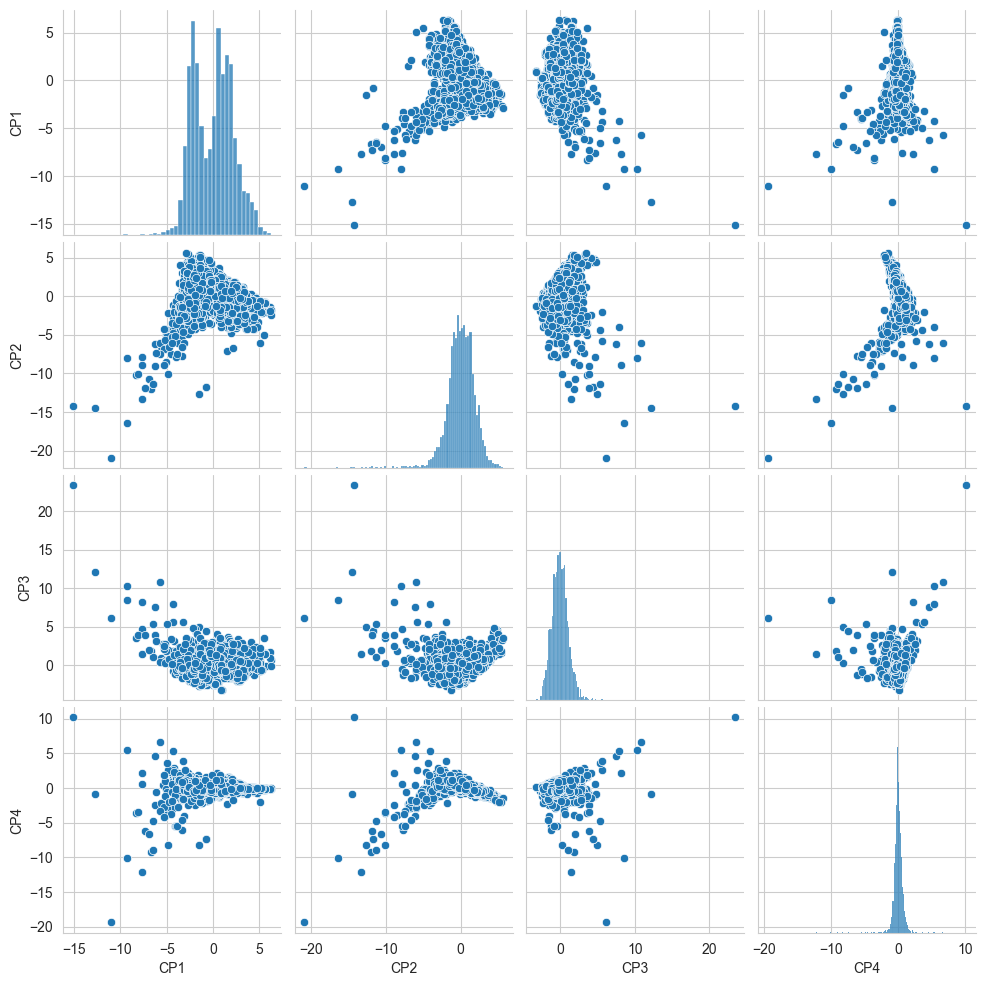

In [490]:
scaler = StandardScaler()
std_braintx = scaler.fit_transform(braint_x)

cov_matrix_brain = np.cov(std_braintx.T)

eig_vals_brain, eig_vectors_brain = np.linalg.eig(cov_matrix_brain)

sorted_indices = np.argsort(eig_vals_brain)[::-1]
eig_vals_brain = eig_vals_brain[sorted_indices]
eig_vectors_brain = eig_vectors_brain[:, sorted_indices]
eig_vectors_brain = np.real(eig_vectors_brain)

W_brain = eig_vectors_brain[:, :4]

brainx_pca_m = std_braintx.dot(W_brain)
eigen_pairs = [(eig_vals_brain[i], eig_vectors_brain[:, i]) for i in range(len(eig_vals_brain))]

pca_m = pd.DataFrame(brainx_pca_m, columns=['CP1', 'CP2', 'CP3', 'CP4'])

print(pca_m.describe())

sns.pairplot(pca_m)
plt.show()

Metodo #2


In [491]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA con 4 componentes principales
pca_brain = PCA(n_components=4)
brainx_pca_skl = pca_brain.fit_transform(std_brainx)
brainx_pca_skl

array([[ 1.13494746, -0.11653928, -0.12207389, -0.30627248],
       [ 4.26214321,  0.04943709,  1.50070581,  0.31306196],
       [-2.48138326,  1.11144579, -0.95783349, -0.11793916],
       ...,
       [-0.20359808,  1.77566408,  1.13305801,  0.33898934],
       [-0.27314507,  0.65503372,  1.59330341, -0.42131414],
       [ 0.30895902, -1.21326935,  1.32536124, -1.09447973]])

In [492]:

proy_pca = pd.DataFrame(brainx_pca_skl, columns=['CP1', 'CP2', 'CP3', 'CP4'])


<Figure size 1000x1000 with 0 Axes>

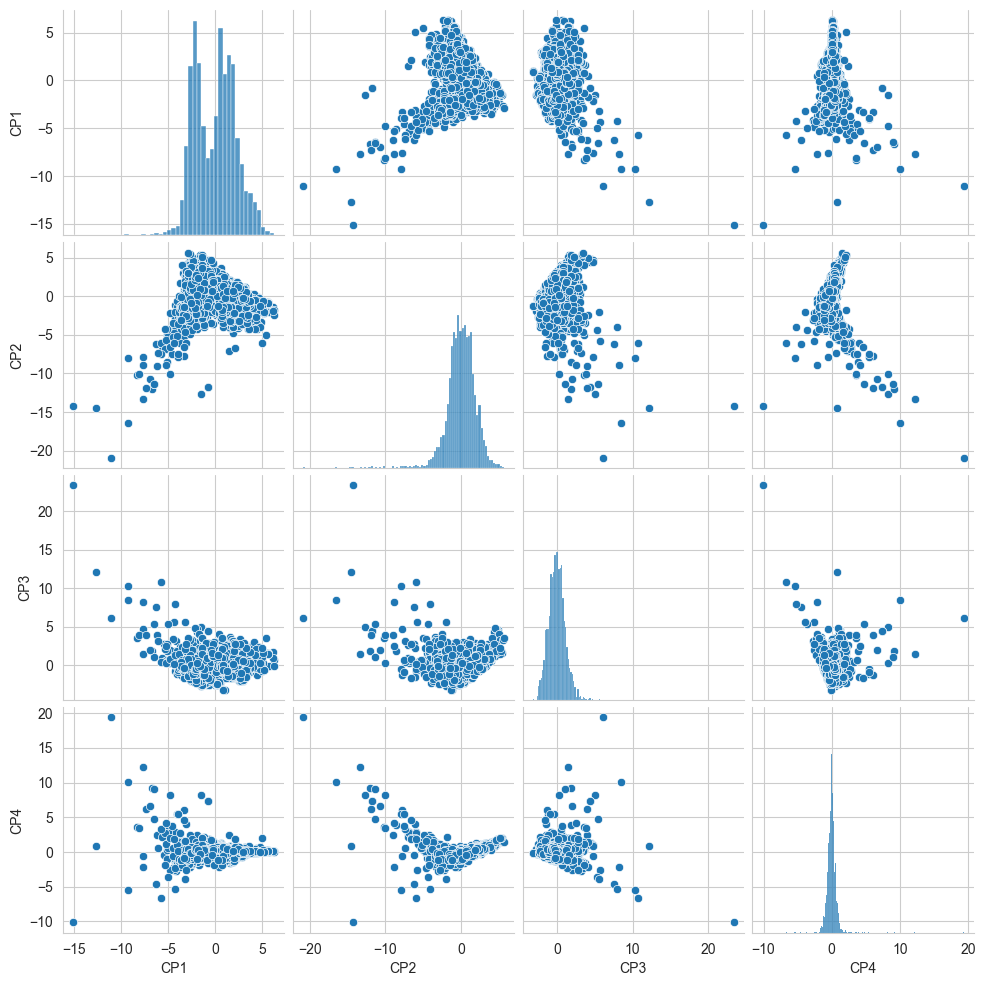

In [493]:
# Resultados de PCA
plt.figure(figsize=(10, 10))
sns.pairplot(proy_pca)
plt.show()


6. Hacer la comparsión de los pairplot con la data original y la data proyectada

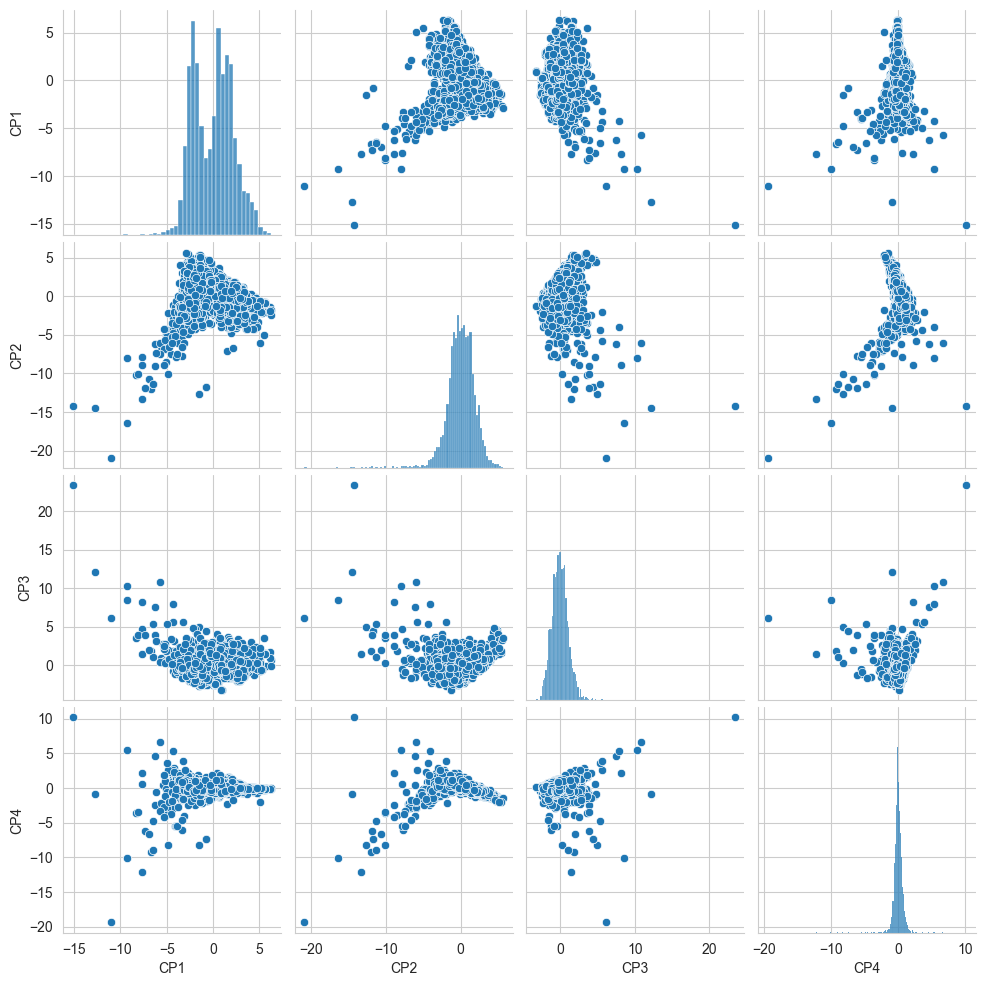

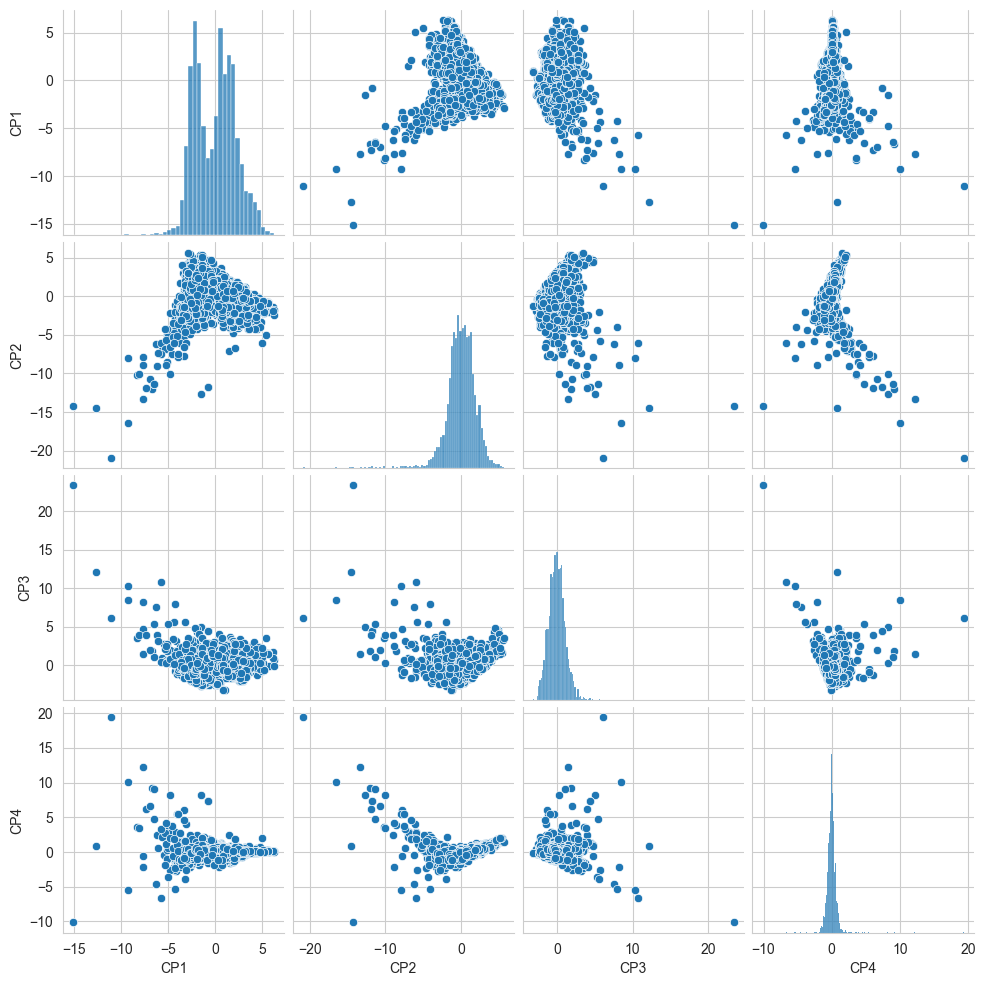

In [494]:
import numpy as np

sorted_indices = np.argsort(eig_vals_brain)[::-1]
eig_vals_brain = eig_vals_brain[sorted_indices]
eig_vectors_brain = eig_vectors_brain[:, sorted_indices]
eig_vectors_brain = np.real(eig_vectors_brain)

W_brain = eig_vectors_brain[:, :4]

brainx_pca_m = std_braintx.dot(W_brain)
eigen_pairs = [(eig_vals_brain[i], eig_vectors_brain[:, i]) for i in range(len(eig_vals_brain))]

pca_m = pd.DataFrame(brainx_pca_m, columns=['CP1', 'CP2', 'CP3', 'CP4'])

sns.pairplot(pca_m)
plt.show()

pca_brain = PCA(n_components=4)
brainx_pca_skl = pca_brain.fit_transform(std_braintx)

proy_pca = pd.DataFrame(brainx_pca_skl, columns=['CP1', 'CP2', 'CP3', 'CP4'])

sns.pairplot(proy_pca)
plt.show()

<Figure size 500x500 with 0 Axes>

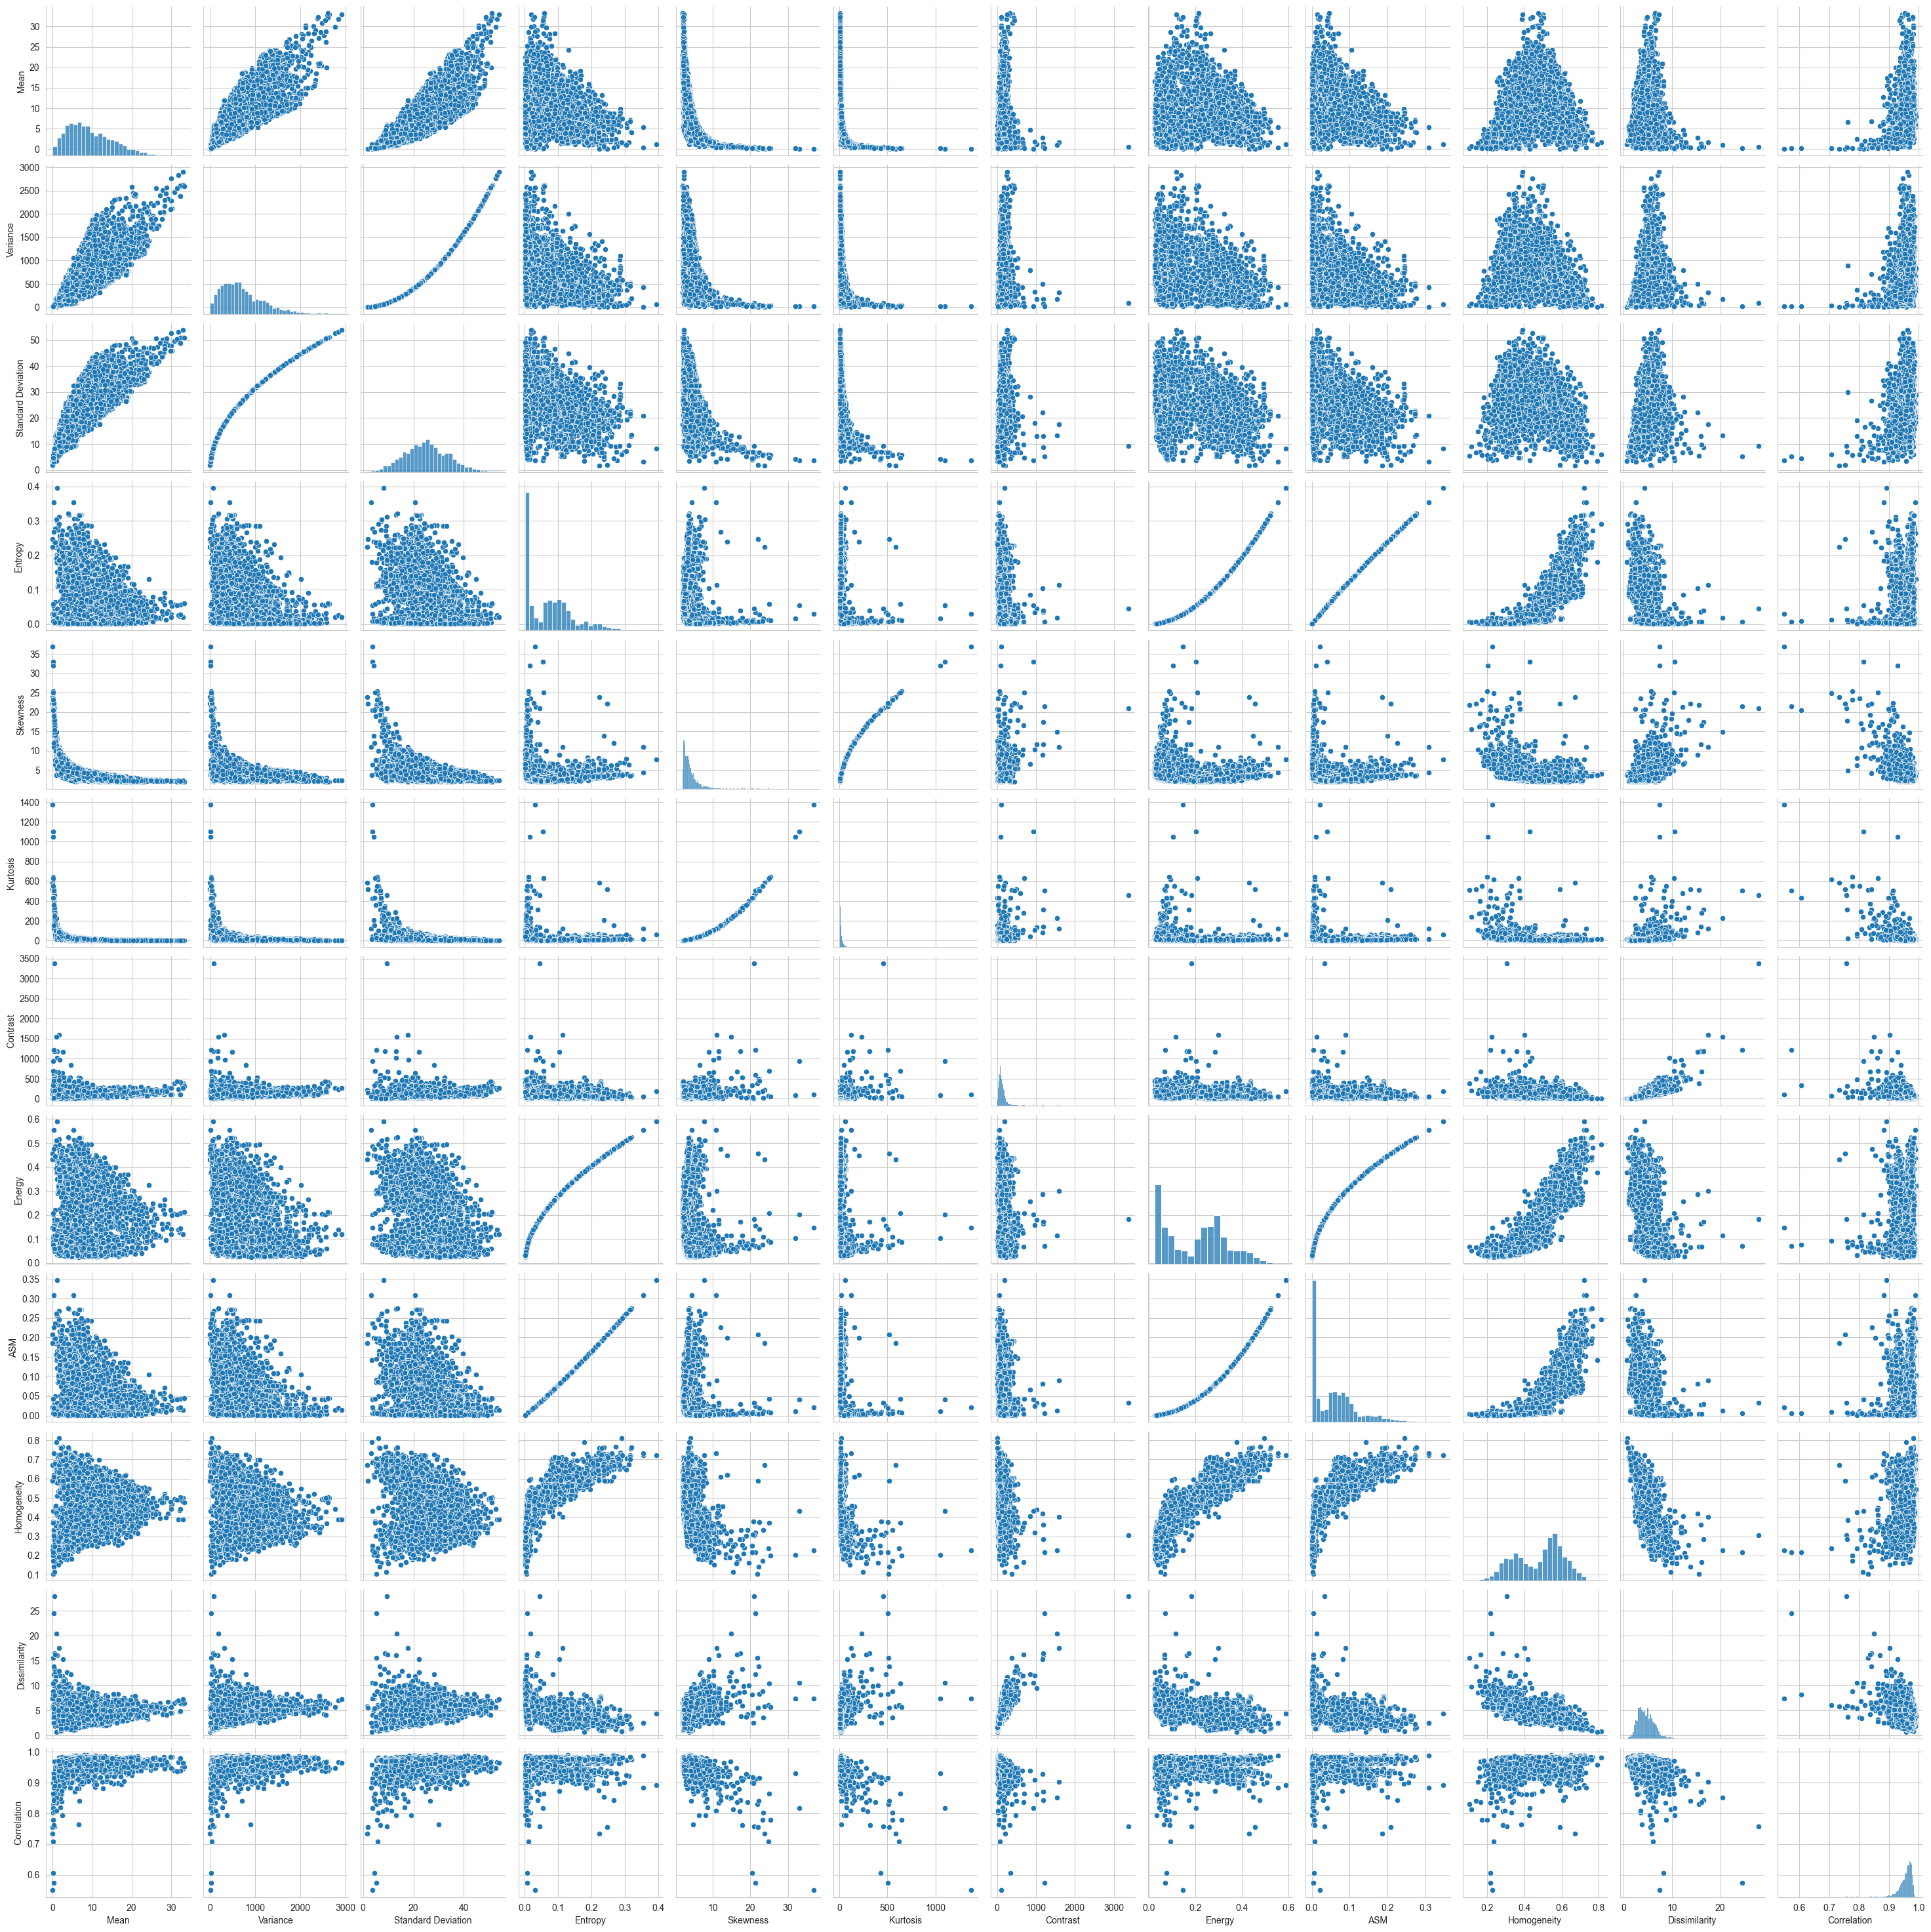

In [495]:
plt.figure(figsize=(5, 5))
sns.pairplot(braint_x)

<Figure size 500x500 with 0 Axes>

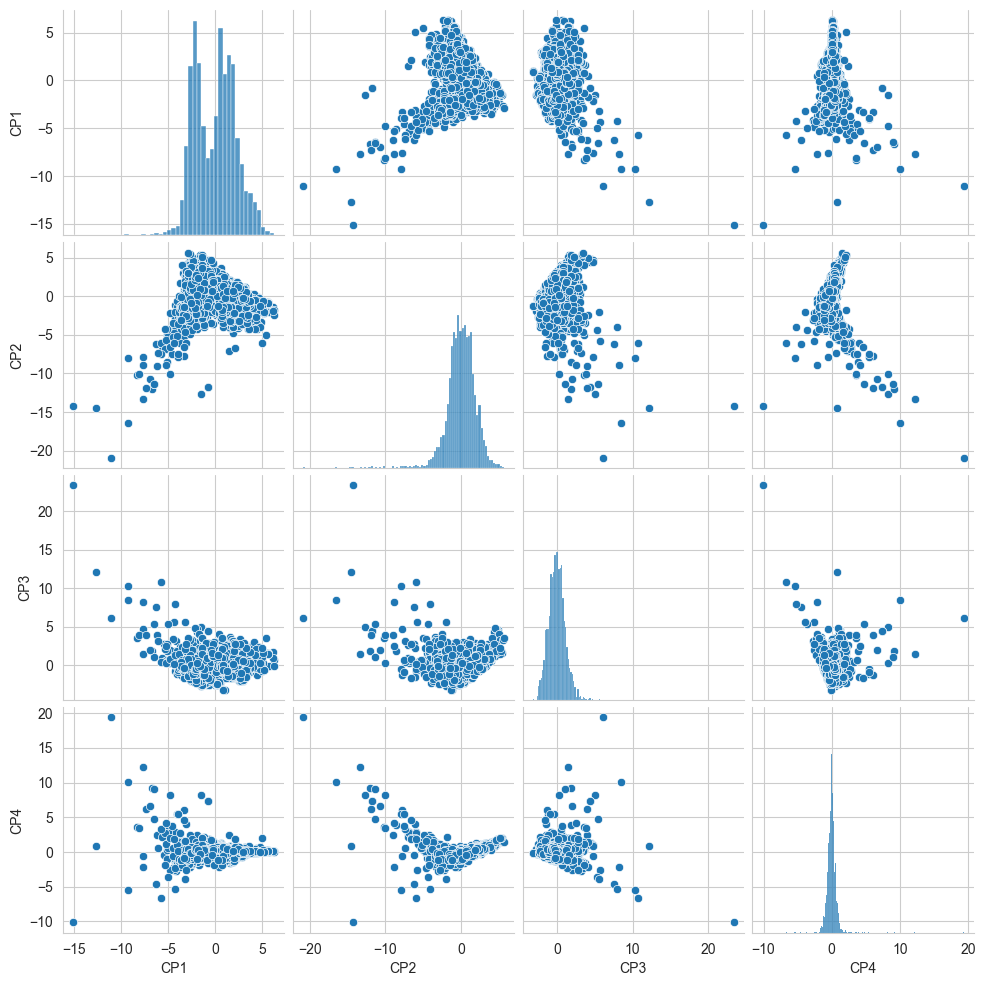

In [496]:
plt.figure(figsize=(5, 5))
sns.pairplot(proy_pca)

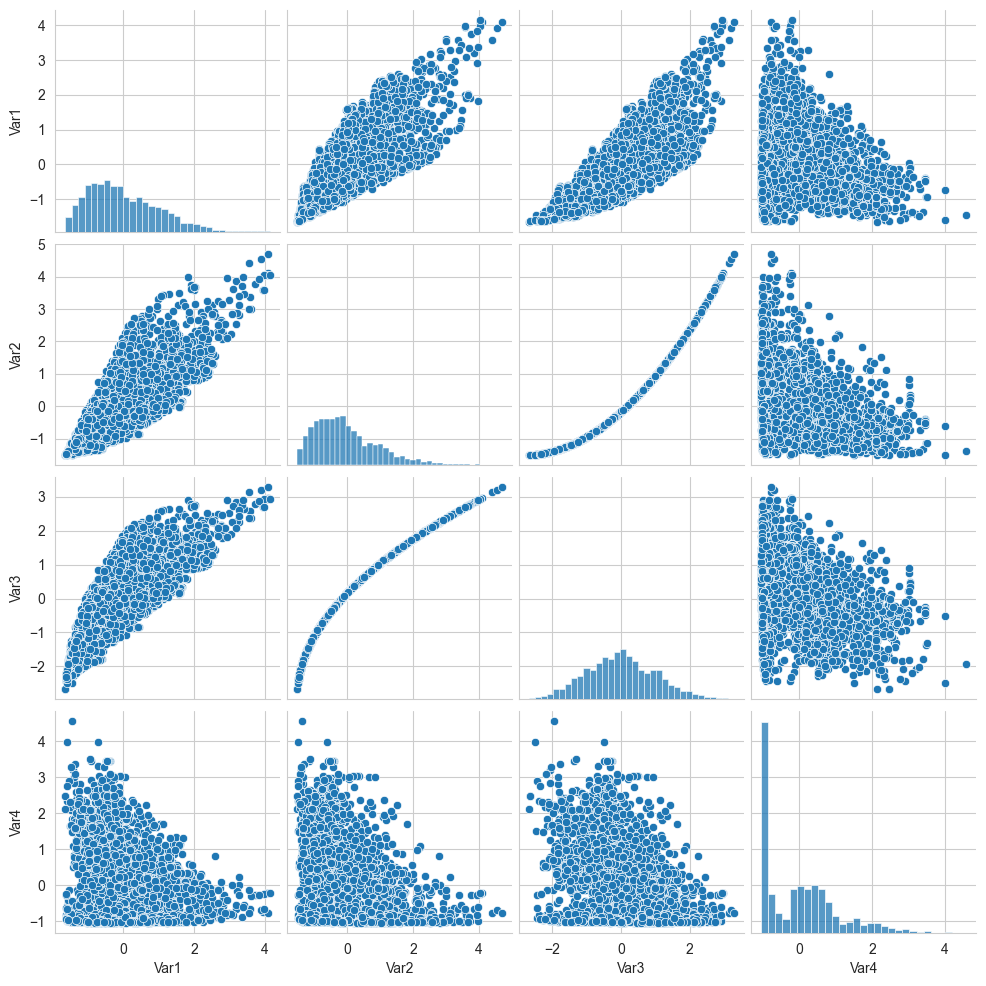

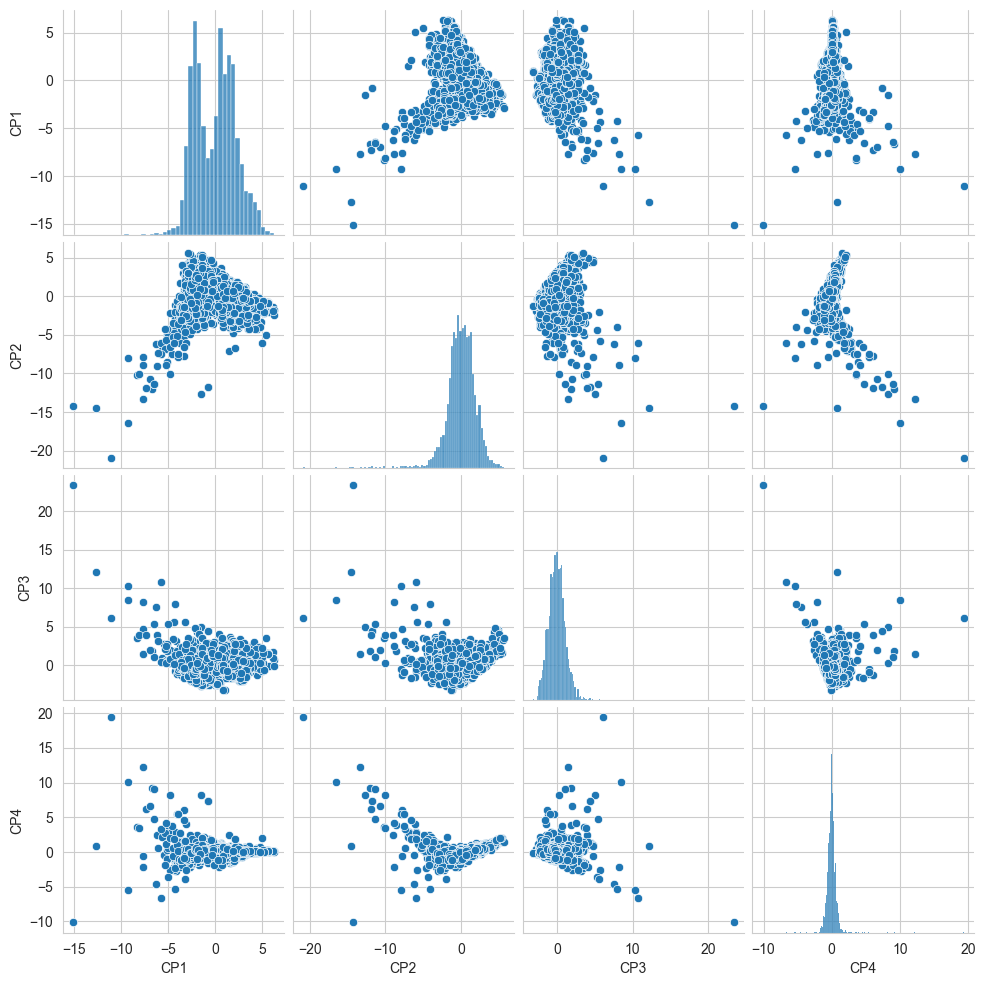

In [497]:
df_original_brain = pd.DataFrame(std_braintx[:, :4], columns=['Var1', 'Var2', 'Var3', 'Var4'])
sns.pairplot(df_original_brain)
plt.show()

sns.pairplot(proy_pca)
plt.show()

# Conclusiones:
Al comparar los pairplot de la data original y la data proyectada, noté que la transformación con PCA reorganiza la información en nuevas dimensiones que maximizan la varianza. En la data original, algunas variables estaban correlacionadas, mientras que en la data proyectada, los componentes principales eran ortogonales entre sí, lo que redujo la redundancia. También observé que la distribución de los datos cambió, pero los patrones generales y posibles agrupamientos se mantuvieron en la nueva representación. En resumen, la proyección permitió reducir la dimensionalidad sin perder demasiada información relevante.
